<a href="https://colab.research.google.com/github/SmirnovDaniil/mephi/blob/main/kaggle/Property_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('drive/MyDrive/data/Train.csv')

In [ ]:
test_data=pd.read_csv('drive/MyDrive/data/Test.csv')

In [ ]:
t=pd.read_csv('drive/MyDrive/data/Test.csv')

Сначала просто посмотрим на данные,удалим выбросы и заполним пропуски -1(заполнил их минус единицей,потому что потом передаю все данные(кроме площади) в catboost как категориальные)

In [ ]:
data.sample(5)

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
50023,50023,2011-7,667,0.0,2,35,1,0,30.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,842000
38526,38526,2011-4,620,1.0,2,34,1,1,30.0,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,4229000
63865,63865,2011-9,567,NaN,3,61,3,1,15.0,0.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2489000
37247,37247,2011-4,604,NaN,3,61,3,0,30.0,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2644000
39194,39194,2011-5,648,NaN,6,45,1,2,15.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5178000


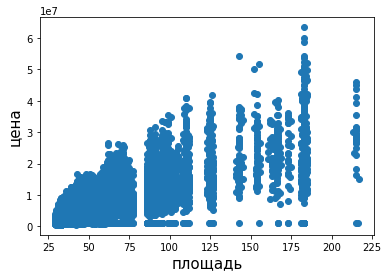

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = data['area'], y = data['price'])
plt.ylabel('цена', fontsize = 15)
plt.xlabel('площадь', fontsize = 15)
plt.show()

In [ ]:
data = data.drop(data[(data['area'] > 75) & (data['price'] < 2000000)].index)
data = data.drop(data[(data['area'] > 125) & (data['area'] < 150) & (data['price'] > 50000000)].index)

In [ ]:
data

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,385,NaN,1,59,3,0,25.0,NaN,2,0,1,0,0,0,0,0,0,0,0,0,0,0,2489000
1,1,2011-1,247,NaN,5,53,2,1,15.0,1.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1995000
2,2,2011-1,115,0.0,7,61,3,0,10.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,3993000
3,3,2011-1,491,1.0,5,61,3,1,30.0,NaN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5709000
4,4,2011-1,623,NaN,3,51,2,1,30.0,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4374000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,655,0.0,2,44,2,0,20.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1838000
99996,99996,2012-3,175,1.0,10,60,3,0,30.0,NaN,5,0,0,0,0,0,0,0,0,0,0,0,0,0,6355000
99997,99997,2012-3,199,1.0,4,64,2,1,30.0,NaN,3,0,1,0,0,0,0,0,0,0,0,0,0,0,6695000
99998,99998,2012-3,226,1.0,10,35,1,1,15.0,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2544000


In [ ]:
data['price'] = np.log1p(data.price)

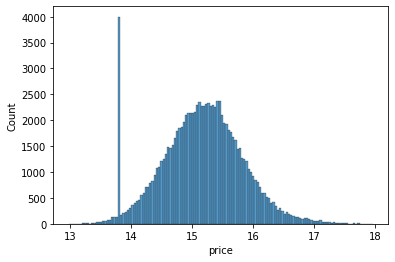

In [ ]:
sns.histplot(data.price)

In [ ]:
data = data.drop(data[(data['area'] > 25) & (data['area'] < 100) & (data['price'] > 13.814) & (data['price'] < 13.817)].index)
data = data.drop(data[(data['area'] > 90) & (data['area'] < 100) & (data['price'] > 15.31) & (data['price'] < 15.33)].index)
data = data.drop(data[(data['area'] > 120) & (data['area'] < 130) & (data['price'] > 15.425) & (data['price'] < 15.450)].index)

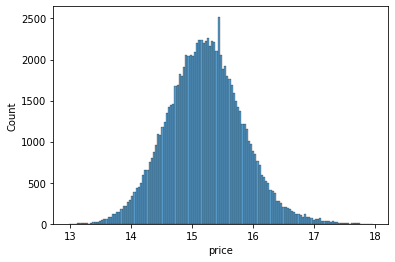

In [ ]:
sns.histplot(data.price)

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.drop(columns = 'date', inplace = True)
data.fillna(-1, inplace = True)
data.drop(columns = 'id', inplace = True)
price = data['price']
data.drop(columns = 'price', inplace = True)
data=data.astype(np.int)

In [ ]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data.drop(columns = 'date', inplace = True)
test_data.fillna(-1, inplace = True)

In [ ]:
idt = test_data.id
test_data=data=test_data.astype(np.int)
test_data.drop(columns = 'id', inplace = True)

In [ ]:
data.columns

Index(['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13', 'year',
       'month'],
      dtype='object')

In [ ]:
data.sample(5)

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,year,month
97701,98,-1,11,34,1,0,25,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,9
78406,105,2,7,46,1,2,15,-1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,6
86956,252,0,2,58,2,0,15,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,2013,7
18518,368,-1,11,49,2,1,20,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,7
17675,14,0,1,31,1,0,20,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2012,7


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, price, test_size = 0.3, random_state = 10)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 59kB/s 


In [ ]:

import catboost as cb


In [ ]:
train_dataset = cb.Pool(X_train, y_train,cat_features=['street_id', 'build_tech', 'floor',  'rooms', 'balcon',
       'metro_dist', 'g_lift', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12','kw13' 
        ]) 
test_dataset = cb.Pool(X_test, y_test,cat_features=['street_id', 'build_tech', 'floor',  'rooms', 'balcon',
       'metro_dist', 'g_lift', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12','kw13' 
        ])

In [ ]:
model = cb.CatBoostRegressor(loss_function="MAE",cat_features=['street_id', 'build_tech', 'floor',  'rooms', 'balcon',
       'metro_dist', 'g_lift', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12','kw13' ])

Тут я очень долго подбирал параметры

In [ ]:
grid = {'iterations': [300, 600, 1200],
        'learning_rate': [0.2, 0.3],
        'depth': [6, 8, 10],
        'l2_leaf_reg': [1, 5, 10]}
model.grid_search(grid, train_dataset)

0:	learn: 12.1756729	test: 12.1803972	best: 12.1803972 (0)	total: 203ms	remaining: 4m 3s
1:	learn: 9.7442924	test: 9.7502268	best: 9.7502268 (1)	total: 300ms	remaining: 2m 59s
2:	learn: 7.7976103	test: 7.8038788	best: 7.8038788 (2)	total: 424ms	remaining: 2m 49s
3:	learn: 6.2398381	test: 6.2462338	best: 6.2462338 (3)	total: 479ms	remaining: 2m 23s
4:	learn: 4.9934494	test: 4.9996005	best: 4.9996005 (4)	total: 509ms	remaining: 2m 1s
5:	learn: 3.9968897	test: 4.0023441	best: 4.0023441 (5)	total: 553ms	remaining: 1m 50s
6:	learn: 3.2001685	test: 3.2041201	best: 3.2041201 (6)	total: 713ms	remaining: 2m 1s
7:	learn: 2.5620189	test: 2.5659717	best: 2.5659717 (7)	total: 745ms	remaining: 1m 50s
8:	learn: 2.0514934	test: 2.0554448	best: 2.0554448 (8)	total: 772ms	remaining: 1m 42s
9:	learn: 1.6434102	test: 1.6473043	best: 1.6473043 (9)	total: 794ms	remaining: 1m 34s
10:	learn: 1.3180686	test: 1.3199809	best: 1.3199809 (10)	total: 860ms	remaining: 1m 32s
11:	learn: 1.0619394	test: 1.0636121	best

KeyboardInterrupt: ignored

In [ ]:
cbr = cb.CatBoostRegressor(iterations = 1000, learning_rate = 0.2, depth  = 8, l2_leaf_reg = 5, loss_function="MAE", cat_features = ['street_id', 'build_tech', 'floor', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12','kw13' 
        ])

In [ ]:
cbr.fit(train_dataset)
cb_pred = cbr.predict(test_dataset)
cb_t = cbr.predict(train_dataset)
print(mean_absolute_error(y_train, cb_t))
mean_absolute_error(y_test, cb_pred)

0:	learn: 0.4177680	total: 147ms	remaining: 2m 27s
1:	learn: 0.3605837	total: 219ms	remaining: 1m 49s
2:	learn: 0.3164293	total: 322ms	remaining: 1m 46s
3:	learn: 0.2845318	total: 419ms	remaining: 1m 44s
4:	learn: 0.2580627	total: 504ms	remaining: 1m 40s
5:	learn: 0.2389380	total: 586ms	remaining: 1m 37s
6:	learn: 0.2236774	total: 700ms	remaining: 1m 39s
7:	learn: 0.2117077	total: 809ms	remaining: 1m 40s
8:	learn: 0.2019500	total: 900ms	remaining: 1m 39s
9:	learn: 0.1949740	total: 998ms	remaining: 1m 38s
10:	learn: 0.1891626	total: 1.09s	remaining: 1m 37s
11:	learn: 0.1846204	total: 1.21s	remaining: 1m 39s
12:	learn: 0.1807915	total: 1.32s	remaining: 1m 40s
13:	learn: 0.1767578	total: 1.43s	remaining: 1m 40s
14:	learn: 0.1739872	total: 1.54s	remaining: 1m 41s
15:	learn: 0.1706308	total: 1.67s	remaining: 1m 42s
16:	learn: 0.1688430	total: 1.77s	remaining: 1m 42s
17:	learn: 0.1645507	total: 1.88s	remaining: 1m 42s
18:	learn: 0.1629177	total: 2s	remaining: 1m 43s
19:	learn: 0.1612342	tota

0.08957520331382722

In [ ]:
mean_absolute_error(np.expm1(y_test), np.expm1(cb_pred))

431234.0282716231

Ошибка на тестовой выборке 431к

In [ ]:
y_res=cbr.predict(test_data)

In [ ]:
y_res=np.array(y_res)

In [ ]:
y_res = np.expm1(y_res)

In [ ]:
y_res

array([1981700.24183535, 2409794.3228822 , 5490868.46489112, ...,
       2677500.36152086, 3263280.79849113, 3191299.91714361])

In [ ]:
y_res=pd.Series(y_res)
y_res

0        1.981700e+06
1        2.409794e+06
2        5.490868e+06
3        1.426475e+06
4        6.727130e+06
             ...     
99995    1.574430e+07
99996    2.023153e+06
99997    2.677500e+06
99998    3.263281e+06
99999    3.191300e+06
Length: 100000, dtype: float64

In [ ]:
y = pd.concat([t, y_ress2], axis=1)

In [ ]:
y.sample()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,0
45285,145285,2013-11,637,1.0,11,51,2,1,5.0,NaN,4,0,1,0,0,0,0,0,0,1,0,0,0,0,5.595224e+06


In [ ]:
y['date'] = pd.to_datetime(y['date'])
y['year'] = y['date'].dt.year
y['month'] = y['date'].dt.month
y.rename(columns = {0 : 'price'}, inplace = True)

In [ ]:
y['new_price']  = np.where(y['year'] > 2012, y['price'] * 1.12, y['price'] * 1.05)

Умножаем на коэффициенты 1.12 и 1.05 потому что тренировачная выборка за 2011 и 2012 год, а тестовая за 2012 и 2013 год,соответсвенно цены выросли за это время(это улучшило скор на лидерборде примерно на 100к)

In [ ]:
y_res_new = y.new_price

In [ ]:
y = pd.concat([idt, y_res_new], axis = 1)

In [ ]:
y.rename(columns={'new_price' : 'price'}, inplace = True)

In [ ]:
y

,id,price
0,100000,2.110511e+06
1,100001,2.566431e+06
2,100002,5.847775e+06
3,100003,1.519195e+06
4,100004,7.164393e+06
...,...,...
99995,199995,1.747617e+07
99996,199996,2.245700e+06
99997,199997,2.972025e+06
99998,199998,3.622242e+06


In [ ]:
y.to_csv('result2.csv', index = False)

Были также испробованы другие модели,но они показали гораздо большую ошибку на тестовой выборке,поэтому я решил оставить только catboost.